#Installons la nouvelle librairie de finance yahoo
Utilisons la commande pip install yfinance

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Importons les librairies utiles pour notre analyse de donnees

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
from datetime import date


# Mettons en place un ticker et une date de debut.
Nous pouvons consulter la liste des symboles boursiers sur le site de yahoo finance:
https://finance.yahoo.com/most-active.

Creons un yfinance object incluant les parametres ci-dessous:

* stock
* start date
* end date

In [ ]:
stock = "GC=F"


#Importons nos donnees d'analyses.
Utilisons la methode pandas_datareader.get_data_yahoo(ticker,start,end)

In [ ]:
# data = pdr.get_data_yahoo(stock,start="2021-01-01")
data =yf.download(stock, start ="2021-1-1")

[*********************100%***********************]  1 of 1 completed


Explorons les donnees head et tail

# L'objectif de notre analyse est de pouvoir predire les differents valeurs de closing price durant differentes periode de l'annee 2022.
## Notre variable Target est:" Close"

## Explorons l'ensemble de notre jeu de donnees

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,1944.699951,154
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951,1952.699951,113
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024,1906.900024,331
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049,1912.300049,122
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976,1834.099976,60
...,...,...,...,...,...,...
2022-09-26,1623.300049,1623.300049,1623.300049,1623.300049,1623.300049,1205
2022-09-27,1632.199951,1636.599976,1626.699951,1626.699951,1626.699951,888
2022-09-28,1620.400024,1660.400024,1620.400024,1660.400024,1660.400024,18311


Verifions la taille de notre jeu de donnees.

In [ ]:
data.shape

(441, 6)

Nous avons 187 lignes contre 6 colonnes

In [ ]:
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=441, freq=None)

La particularite de notre jeu de donnees est que les indices sont representees par les dates.Nous avons choisi d'etudier les donnees de l'annee 2022 jusqu'a aujourd'hui.

Verifions le type des donnees de notre dataset.

In [ ]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Toutes les variables sont du type "float64" a l'exception de la variable "volume".

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2021-01-04 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       441 non-null    float64
 1   High       441 non-null    float64
 2   Low        441 non-null    float64
 3   Close      441 non-null    float64
 4   Adj Close  441 non-null    float64
 5   Volume     441 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 24.1 KB


In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.duplicated().any()

False

# Analyse Univarie

In [ ]:
plt.figure(figsize=(9,6))
fig = px.line(data,x=data.index,y='Open',title="La serie des valeurs Open jusqu'a Septembre 2022")
fig.show()


<Figure size 648x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,6))
fig = px.line(data,x=data.index,y='High',title="La serie des valeurs High jusqu'a Septembre 2022")
fig.show()

<Figure size 648x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,6))
fig = px.line(data,x=data.index,y='Low',title="La serie des valeur Low jusqu'a Septembre 2022")
fig.show()

<Figure size 648x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,6))
fig = px.line(data,x=data.index,y='Close',title="La serie des valeurs close jusqu'a Septembre 2022")
fig.show()

<Figure size 648x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,8))
fig = px.line(data,x=data.index,y=data["Adj Close"],title="La serie des Adj Close jusqu'a Septembre 2022")
fig.show()


<Figure size 720x576 with 0 Axes>

Comme premiere conclusion generale,nous remarquons que tous les series ont les meme representations. Nous pouvons dire que les donnees sont fortement semblables. Une analyse de colinearite nous confirmera ce resulta.

In [ ]:
plt.figure(figsize=(10,8))
fig = px.line(data,x=data.index,y=data["Volume"],title="La serie des Volume jusqu'a Septembre 2022")
fig.show()

<Figure size 720x576 with 0 Axes>

# Analyse Multivariee

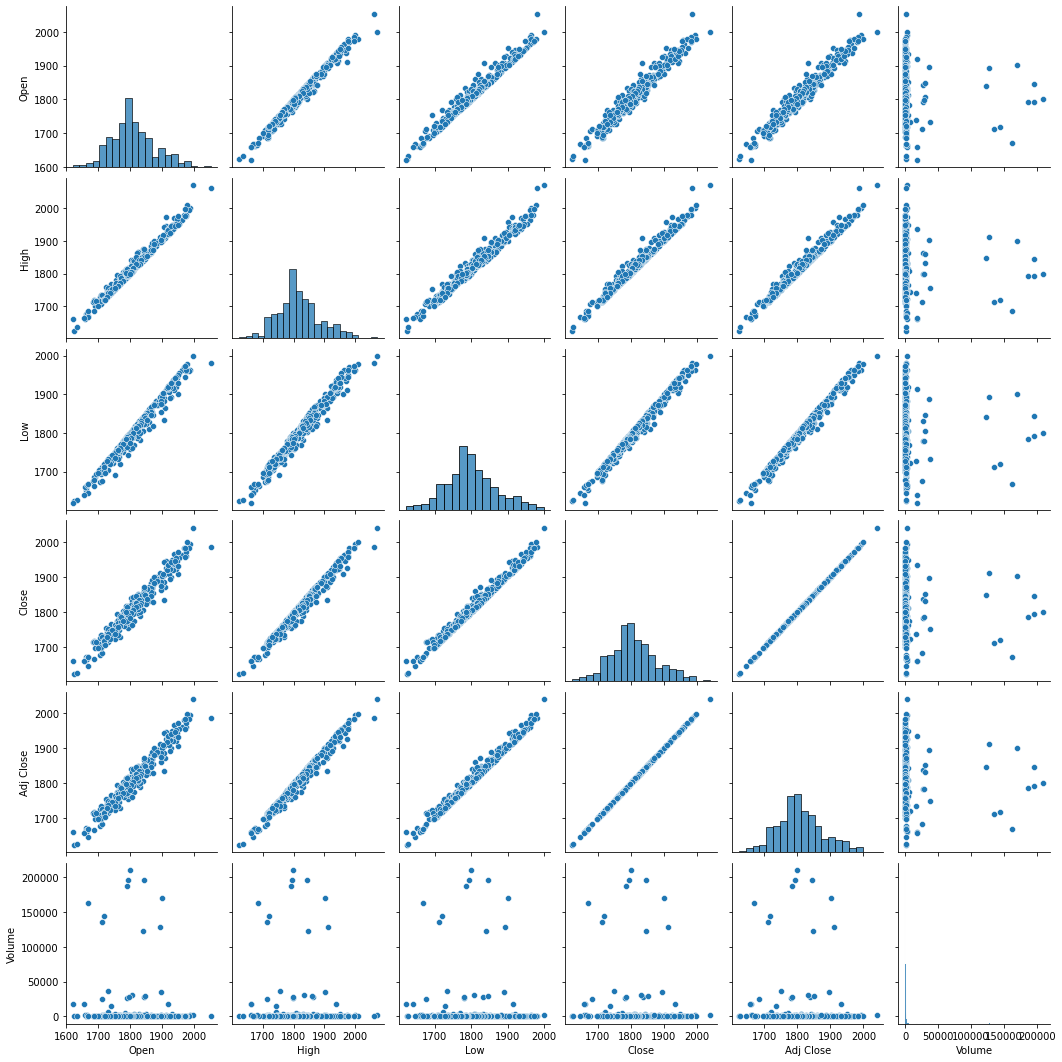

In [ ]:
sns.pairplot(data)

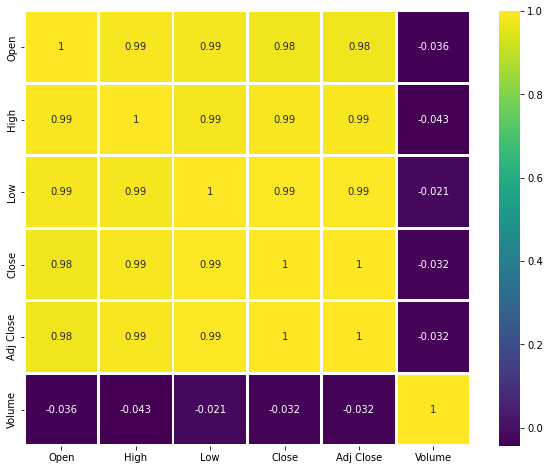

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="viridis",linewidths=2,linecolor="w")

Les variables "open,High,low et close" sont fortement colineaire avec notre variable adj close. Dans la suite de notre analyse nous allons uniquement nous concentrer sur la variables adj close.
Toutefois, nous constantons que le volume n'est pas tres dependant des variables "open,High,low et close,adj close",il y a une faible colinearite.

#Features Engineering
## Accedons uniquement a la variable Close pour la prediction.

In [ ]:
# data2 = data.drop(["Open","Close","High","Low"], axis=1)
# data2 = data.loc[:,"Close"].copy()
data2 = pd.DataFrame(data.loc[:,"Close"])

In [ ]:
data2.head()

,Close
Date,
2021-01-04,1944.699951
2021-01-05,1952.699951
2021-01-06,1906.900024
2021-01-07,1912.300049
2021-01-08,1834.099976


In [ ]:
data2.shape

(441, 1)

Visualisons le graph historique des valeurs de stocks

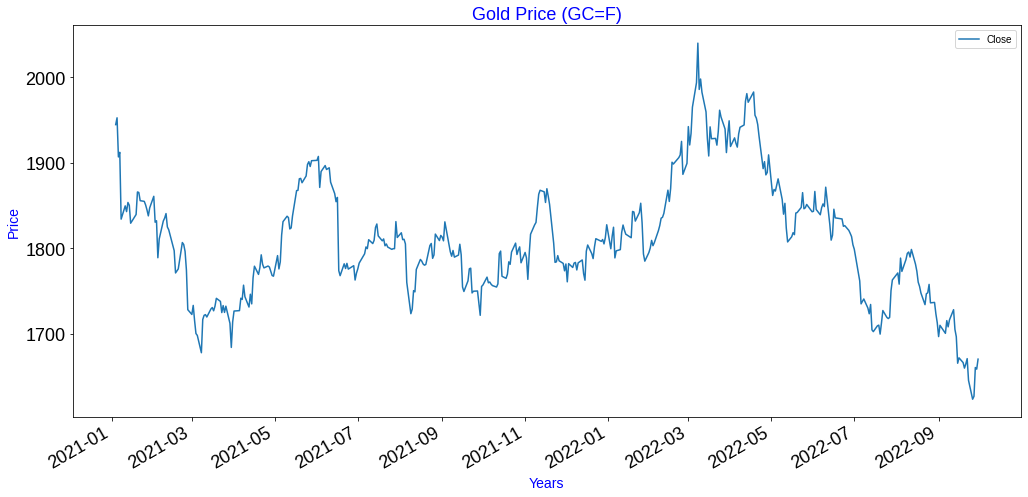

In [ ]:
data2.plot(figsize = (17, 8),fontsize =18)
plt.style.use("seaborn")
plt.title('Gold Price (GC=F)',fontsize=18, color='blue')
plt.xlabel('Years',fontsize=14, color='blue')
plt.ylabel('Price',fontsize=14, color='blue')
plt.show()

## Etablissons la separations des donnees d'entrainement et de test.
## verifions les tailles de ces derniers

In [ ]:
training_set=data2["Close"]
training_set =-pd.DataFrame(training_set)

# Normalisons les donnees de notre jeu.
##Utilisons la methode de preprocessing MinMaxscaler

Importons les librairies sklearn utiles pour la suite de l'analyse

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Feature Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
training_set_scaled =scaler.fit_transform(training_set)


In [ ]:
# Démonstration pour la création de "X_data" et "y_data"
print(training_set_scaled[0:1,0] ) 
print(training_set_scaled[1,0])

[0.22888686]
0.2096929936958638


In [ ]:
# Permet de créer "X_data" et "y_data" à partir de la série temporelle
X_data=[]
y_data=[]
const=1
for i in range(len(training_set_scaled)-1):
  X_data.append(training_set_scaled[i:i+const,0])
  y_data.append(training_set_scaled[i+const,0])

## Transformation des "X_data" et "y_data" en objet de type np.array

In [ ]:
# Permert de transformer les "X_data" et "y_data" en objet de type np.array pour pourvoir faire des calcule avec RNN
import numpy as np
X_data=np.array(X_data)
y_data=np.array(y_data)

X_data.shape,y_data.shape

((440, 1), (440,))

Redimensionnement de "X_data" en ajoutant une nouvelle dimension de taille 1

In [ ]:
# Permet de redimensionner "X_data" en ajoutant une nouvelle dimension de shape "1"
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))
X_data.shape

(440, 1, 1)

Séparation des valeurs normalisées et redimensionnées(X_train) en données de train et de test

In [ ]:
# Permet de séparer les "X_data" et "y_data" en données de "train"
train_size=int(len(X_data)*0.70)
X_train=X_data[0:train_size,:]
y_train=y_data[0:train_size]

In [ ]:
# Permet de séparer les "X_data" et "y_data" en données de "test"
X_test=X_data[train_size:len(X_data),:]
y_test=y_data[train_size:len(y_data)]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM,GRU

Construction du model GRU

In [ ]:
def model_gru(inputShape):
  modelg = Sequential()
  modelg.add(GRU(128, activation="relu", input_shape=inputShape, return_sequences=True))
  modelg.add(GRU(64, activation="relu", return_sequences=True))
  modelg.add(GRU(48, activation="relu", return_sequences=True))
  modelg.add(GRU(24, activation="relu", return_sequences=True))
  modelg.add(GRU(12, activation="relu", return_sequences=False))
  modelg.add(Dense(50))
  modelg.add(Dense(25))
  modelg.add(Dense(1))
  return modelg


In [ ]:
# Application du modèle GRU
modelg= model_gru((X_train.shape[1],1))
modelg.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 1, 128)            50304     
                                                                 
 gru_6 (GRU)                 (None, 1, 64)             37248     
                                                                 
 gru_7 (GRU)                 (None, 1, 48)             16416     
                                                                 
 gru_8 (GRU)                 (None, 1, 24)             5328      
                                                                 
 gru_9 (GRU)                 (None, 12)                1368      
                                                                 
 dense_15 (Dense)            (None, 50)                650       
                                                                 
 dense_16 (Dense)            (None, 25)               

In [ ]:
# compilation
modelg.compile(optimizer="adam",loss="mean_squared_error",metrics="RootMeanSquaredError")

In [ ]:
# Entrainement
modelg.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
10/10 [==============================] - 6s 21ms/step - loss: 0.2434 - root_mean_squared_error: 0.4934
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0809 - root_mean_squared_error: 0.2844
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573
Epoch 4/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0263 - root_mean_squared_error: 0.1622
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0200 - root_mean_squared_error: 0.1415
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0200 - root_mean_squared_error: 0.1413
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0197

In [ ]:
eval_gru_train = modelg.evaluate(X_train,y_train)
eval_gru_train

10/10 [==============================] - 1s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415


[0.0017225091578438878, 0.041503120213747025]

In [ ]:
eval_gru_test = modelg.evaluate(X_test,y_test)
eval_gru_test

5/5 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386


[0.0014928746968507767, 0.038637734949588776]

In [ ]:
# Prévision sur les données de "X_test"
pred_test_gru= modelg.predict(X_test)
pred_test_gru

array([[0.26631248],
       [0.2110073 ],
       [0.22884466],
       [0.2596749 ],
       [0.32241052],
       [0.27321726],
       [0.2387265 ],
       [0.30591094],
       [0.2828729 ],
       [0.29718363],
       [0.30752632],
       [0.27254692],
       [0.25527406],
       [0.24936338],
       [0.18260743],
       [0.15890713],
       [0.18582834],
       [0.153894  ],
       [0.22478782],
       [0.23205592],
       [0.24805476],
       [0.27881992],
       [0.36747962],
       [0.34751776],
       [0.3857813 ],
       [0.37869123],
       [0.32875153],
       [0.44684654],
       [0.42996532],
       [0.43470448],
       [0.4163694 ],
       [0.39777303],
       [0.45668542],
       [0.4936834 ],
       [0.46621388],
       [0.52917653],
       [0.56521314],
       [0.55164444],
       [0.5413234 ],
       [0.54635954],
       [0.49083218],
       [0.489519  ],
       [0.47649515],
       [0.4395039 ],
       [0.47994965],
       [0.4773575 ],
       [0.46898624],
       [0.487

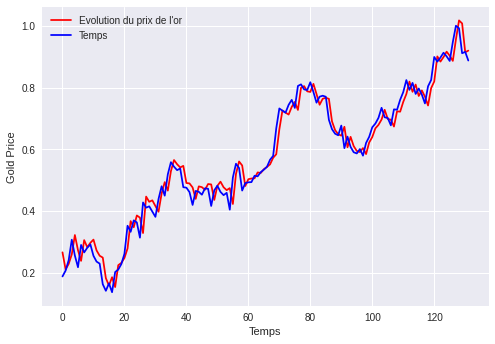

In [ ]:
# graphique 
plt.plot(pred_test_gru,color="red",label="Evolution du prix de l'or")
plt.plot(y_test,color="blue",label="Temps")
plt.xlabel("Temps")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

#Construction du model LSTM

In [ ]:
def model_lstm(input_shape):
  model_lstm = Sequential()
  model_lstm.add(LSTM(50, activation="relu", input_shape=(X_train.shape[1],1), return_sequences=True))
  model_lstm.add(LSTM(50, activation="relu", return_sequences=False))
  model_lstm.add(Dense(50))
  model_lstm.add(Dense(25))
  model_lstm.add(Dense(1))
  return model_lstm

In [ ]:
# Application du modèle GRU
model_lstm= model_lstm((X_train.shape[1],1))


In [ ]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 34,451
Trainable params: 34,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilation
model_lstm.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model_lstm.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 8ms/step - loss: 0.2418
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0764
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0241
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0237
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0154
Epoch 12/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 13/100
10/10 [=================

In [ ]:
eval_lstm_train = model_lstm.evaluate(X_train,y_train)
eval_lstm_train

10/10 [==============================] - 0s 4ms/step - loss: 0.0017


0.0017189962090924382

In [ ]:
eval_lstm_test = model_lstm.evaluate(X_test,y_test)
eval_lstm_test

5/5 [==============================] - 0s 4ms/step - loss: 0.0015


0.0014777970500290394

In [ ]:
# Prévision sur les données de "X_test"
pred_test_lstm= model_lstm.predict(X_test)
pred_test_lstm

array([[0.2563605 ],
       [0.20119235],
       [0.21822217],
       [0.24965006],
       [0.31233302],
       [0.26332068],
       [0.22834292],
       [0.2960037 ],
       [0.27301958],
       [0.28732246],
       [0.29760718],
       [0.26264587],
       [0.2451902 ],
       [0.2391867 ],
       [0.178525  ],
       [0.15954074],
       [0.18110058],
       [0.1555149 ],
       [0.21405894],
       [0.22151604],
       [0.2378554 ],
       [0.2689533 ],
       [0.3562678 ],
       [0.33697945],
       [0.37360343],
       [0.36693585],
       [0.31858024],
       [0.43195322],
       [0.41482666],
       [0.4192166 ],
       [0.4021991 ],
       [0.3848477 ],
       [0.4435357 ],
       [0.48649618],
       [0.45468786],
       [0.52753896],
       [0.5701875 ],
       [0.55422425],
       [0.5420059 ],
       [0.54797614],
       [0.48321748],
       [0.48170575],
       [0.46665153],
       [0.4238611 ],
       [0.4706554 ],
       [0.4676517 ],
       [0.45792094],
       [0.479

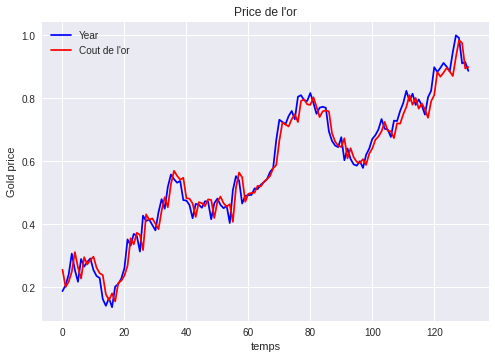

In [ ]:
# graphique 
plt.plot(y_test,color="blue",label="Year")
plt.plot(pred_test_lstm,color="red",label="Cout de l'or")
plt.title("Price de l'or")
plt.xlabel("temps")
plt.ylabel("Gold price")
plt.legend()
plt.show()